In [3]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Sample corpus
# -----------------------------
sentences = [
    # 🐶 Animals
    "dog cat puppy kitten",
    "dog bark puppy",
    "cat meow kitten",
    "lion tiger leopard",
    "lion roar tiger",
    "elephant giraffe zebra",
    "zebra giraffe elephant",

    # 🍎 Fruits
    "apple banana mango",
    "banana mango papaya",
    "apple fruit sweet",
    "mango fruit sweet",
    "orange lemon citrus",
    "lemon lime citrus",

    # 🚗 Vehicles
    "car bus truck",
    "truck lorry cargo",
    "bus passenger transport",
    "car drive road",
    "bike bicycle cycle",
    "bike ride road",

    # 💻 Technology
    "computer laptop keyboard",
    "computer processor memory",
    "laptop screen keyboard",
    "software hardware computer",
    "python java programming",
    "coding programming software",
]


# Tokenize (very simple)
tokenized_sentences = [s.lower().split() for s in sentences]

# -----------------------------
# Step 2: Train Word2Vec
# -----------------------------
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,   # embedding dimension
    window=3,
    min_count=1,
    sg=1              # 1 = Skip-gram, 0 = CBOW
)

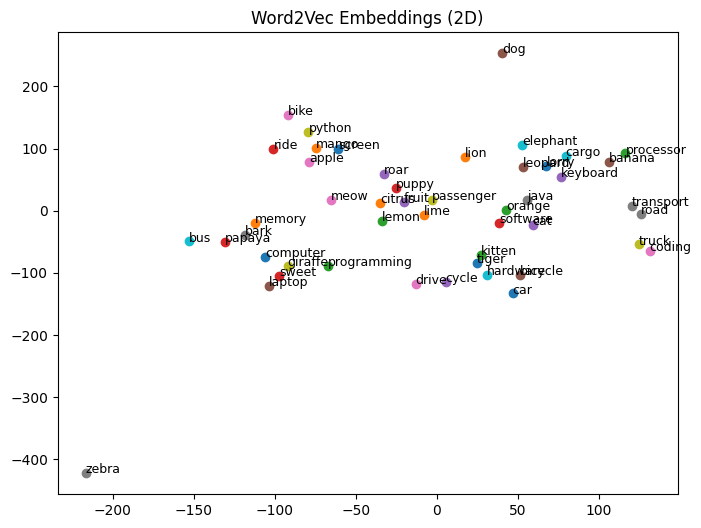

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# words and vectors
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])  # ✅ FIX 1

# t-SNE (perplexity < len(words))
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=3,   # ✅ FIX 2
    init="random"
)

vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)

plt.title("Word2Vec Embeddings (2D)")
plt.show()


In [5]:
corpus = (
    # Animals
    ["dog cat puppy kitten"] * 30 +
    ["lion tiger leopard"] * 30 +
    ["elephant giraffe zebra"] * 30 +

    # Fruits
    ["apple banana mango"] * 30 +
    ["orange lemon citrus"] * 30 +

    # Vehicles
    ["car bus truck"] * 30 +
    ["bike bicycle cycle"] * 30 +

    # Tech
    ["computer laptop keyboard"] * 30 +
    ["software hardware computer"] * 30 +
    ["python java programming"] * 30
)

tokenized = [s.split() for s in corpus]


In [6]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=tokenized,
    vector_size=50,
    window=4,      # bigger context
    min_count=1,
    sg=1,          # Skip-gram
    epochs=50,
    workers=1      # deterministic
)


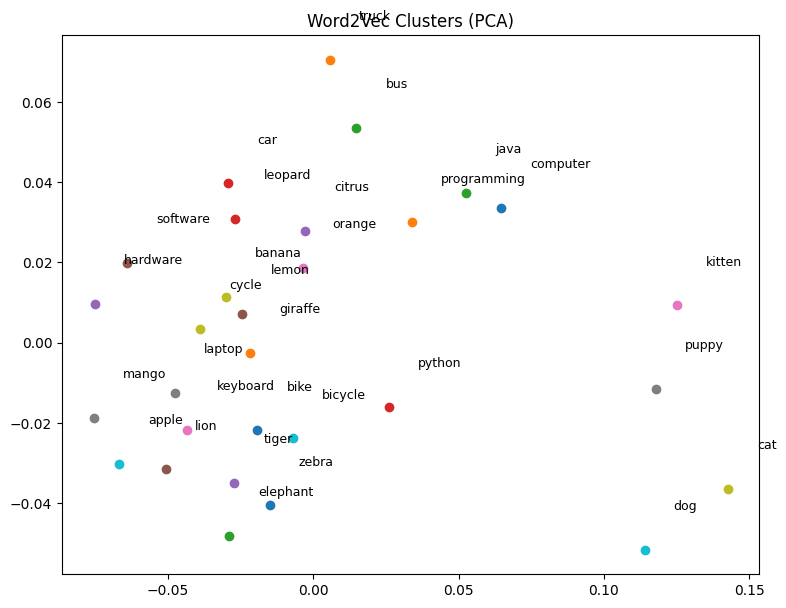

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(model.wv.index_to_key)
vectors = np.array([model.wv[w] for w in words])

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(9, 7))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)

plt.title("Word2Vec Clusters (PCA)")
plt.show()
